<a href="https://colab.research.google.com/github/Arsh-Khan/FasterRCNN-Model/blob/main/FasterRCNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import time

while True:
    try:
        requests.get('https://www.google.com')
        print("Kept alive.")
    except:
        print("Failed to keep alive.")
    time.sleep(600)

In [1]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)
# drive.flush_and_unmount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
%cd /content/gdrive/MyDrive/KAVACH 23 404 ERROR NAME NOT FOUND/


/content/gdrive/.shortcut-targets-by-id/1fQyCyWXz08R72aVSwSQGaJggvEcqgoNB/KAVACH 23 404 ERROR NAME NOT FOUND


In [2]:
!unzip Tensorflow.zip -d /


Streaming output truncated to the last 5000 lines.
  inflating: /content/Tensorflow/workspace/images/train/video11_990.jpg  
  inflating: /content/Tensorflow/workspace/images/train/Cars380.png  
  inflating: /content/Tensorflow/workspace/images/train/car-wbs-KA01CA2555_00000.png  
  inflating: /content/Tensorflow/workspace/images/train/video8_130.jpg  
  inflating: /content/Tensorflow/workspace/images/train/video11_4430.jpg  
  inflating: /content/Tensorflow/workspace/images/train/car-wbs-KL60N5344_00001.xml  
  inflating: /content/Tensorflow/workspace/images/train/Cars205.xml  
  inflating: /content/Tensorflow/workspace/images/train/HP21.xml  
  inflating: /content/Tensorflow/workspace/images/train/PB6.jpg  
  inflating: /content/Tensorflow/workspace/images/train/video11_810.xml  
  inflating: /content/Tensorflow/workspace/images/train/175ff546-0679-4cbb-ab03-acfcd96877b7___Maruti_Wagon_R_Rear.jpg.jpeg  
  inflating: /content/Tensorflow/workspace/images/train/Cars334.png  
  inflating

In [4]:
%cd /content

/content


In [5]:
%ls

gdrive/  sample_data/  Tensorflow/


In [6]:
import os
CUSTOM_MODEL_NAME = 'my_faster_rcnn'
PRETRAINED_MODEL_NAME = 'faster_rcnn_resnet101_v1_640x640_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz'
# PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_nas_coco_2018_01_28.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME),
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'),
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'),
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'),
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME),
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [7]:
if os.name=='nt':
    !pip install wget
    import wget

In [8]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}
# Install Tensorflow Object Detection
if os.name=='posix':
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install .

if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e .

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
protobuf-compiler is already the newest version (3.12.4-1ubuntu7.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Processing /content/Tensorflow/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.6/28.6 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 26.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2023-08-04 19:34:22.691207: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-04 19:34:23.913953: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-04 19:34:27.153199: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-04 19:34:27.690455: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [ ]:
!pip install --upgrade protobuf==3.20.0


In [ ]:
!pip install PyYaml

In [ ]:
!pip install tensorflow --upgrade

In [ ]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2
!pip install matplotlib

In [ ]:
!pip install pip==21.3.1

In [ ]:
!pip install tensorrt

In [ ]:
!pip install tensorflow-gpu

In [9]:
import object_detection

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.2.1
altair                           4.2.2
anyio                            3.7.1
apache-beam                      2.49.0
appdirs                          1.4.4
argon2-cffi                      21.3.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.0
arviz                            0.15.1
astropy                          5.2.2
astunparse                       1.6.3
async-timeout                    4.0.2
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
avro-python3                     1.10.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.

In [ ]:
!pip3 freeze > requirements.txt

In [ ]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2023-08-04 19:36:06--  http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.107.128, 74.125.20.128, 108.177.98.128, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.107.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353643040 (337M) [application/x-tar]
Saving to: ‘faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz’

faster_rcnn_resnet1 100%[===================>] 337.26M   162MB/s    in 2.1s    

2023-08-04 19:36:09 (162 MB/s) - ‘faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz’ saved [353643040/353643040]

faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/checkpoint
faster_rcnn_resnet101_v1_64

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)
# drive.flush_and_unmount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import shutil

# Source folder in Google Drive
# source_train_path = "/content/gdrive/MyDrive/KAVACH 23 404 ERROR NAME NOT FOUND/ANPR Dataset/train"
source_test_path = "/content/gdrive/MyDrive/KAVACH 23 404 ERROR NAME NOT FOUND/ANPR Dataset/test"

# Destination folder in Colab
# destination_train_path = "/content/Tensorflow/workspace/images/train"
destination_test_path = "/content/Tensorflow/workspace/images/test"

# Use shutil to copy the folder and its contents
# shutil.copytree(source_train_path, destination_train_path)
shutil.copytree(source_test_path, destination_test_path)

'/content/Tensorflow/workspace/images/test'

In [10]:
labels = [{'name':'licence', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [ ]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}


In [ ]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow/scripts'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 1 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [ ]:
%rm -rf /content/Tensorflow/workspace/images/train/NL1.xml

In [ ]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')}
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')}

Traceback (most recent call last):
  File "/content/Tensorflow/scripts/generate_tfrecord.py", line 168, in <module>
    tf.app.run()
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/platform/app.py", line 36, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py", line 308, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py", line 254, in _run_main
    sys.exit(main(argv))
  File "/content/Tensorflow/scripts/generate_tfrecord.py", line 158, in main
    tf_example = create_tf_example(group, path)
  File "/content/Tensorflow/scripts/generate_tfrecord.py", line 112, in create_tf_example
    encoded_jpg = fid.read()
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/lib/io/file_io.py", line 116, in read
    self._preread_check()
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/lib/io/file_io.py", line 77, in _prerea

In [ ]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

In [ ]:
# config

In [12]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [13]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [ ]:
config

{'model': faster_rcnn {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 1024
       width: 1024
     }
   }
   feature_extractor {
     type: "faster_rcnn_resnet50_keras"
     batch_norm_trainable: true
   }
   first_stage_anchor_generator {
     grid_anchor_generator {
       height_stride: 16
       width_stride: 16
       scales: 0.25
       scales: 0.5
       scales: 1.0
       scales: 2.0
       aspect_ratios: 0.5
       aspect_ratios: 1.0
       aspect_ratios: 2.0
     }
   }
   first_stage_box_predictor_conv_hyperparams {
     op: CONV
     regularizer {
       l2_regularizer {
         weight: 0.0
       }
     }
     initializer {
       truncated_normal_initializer {
         stddev: 0.009999999776482582
       }
     }
   }
   first_stage_nms_score_threshold: 0.0
   first_stage_nms_iou_threshold: 0.699999988079071
   first_stage_max_proposals: 300
   first_stage_localization_loss_weight: 2.0
   first_stage_objectness_loss_weight: 1.0
   initia

In [ ]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:
    proto_str = f.read()
    text_format.Merge(proto_str, pipeline_config)

In [ ]:
pipeline_config.model.faster_rcnn.num_classes = len(labels)
pipeline_config.train_config.batch_size = 3
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [ ]:
config

{'model': faster_rcnn {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 1024
       width: 1024
     }
   }
   feature_extractor {
     type: "faster_rcnn_resnet50_keras"
     batch_norm_trainable: true
   }
   first_stage_anchor_generator {
     grid_anchor_generator {
       height_stride: 16
       width_stride: 16
       scales: 0.25
       scales: 0.5
       scales: 1.0
       scales: 2.0
       aspect_ratios: 0.5
       aspect_ratios: 1.0
       aspect_ratios: 2.0
     }
   }
   first_stage_box_predictor_conv_hyperparams {
     op: CONV
     regularizer {
       l2_regularizer {
         weight: 0.0
       }
     }
     initializer {
       truncated_normal_initializer {
         stddev: 0.009999999776482582
       }
     }
   }
   first_stage_nms_score_threshold: 0.0
   first_stage_nms_iou_threshold: 0.699999988079071
   first_stage_max_proposals: 300
   first_stage_localization_loss_weight: 2.0
   first_stage_objectness_loss_weight: 1.0
   initia

In [ ]:
config_text = text_format.MessageToString(pipeline_config)
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:
    f.write(config_text)

In [ ]:
#traning

In [15]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=15000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [ ]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_faster_rcnn --pipeline_config_path=Tensorflow/workspace/models/my_faster_rcnn/pipeline.config --num_train_steps=15000


In [ ]:
!python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_faster_rcnn --pipeline_config_path=Tensorflow/workspace/models/my_faster_rcnn/pipeline.config --num_train_steps=15000

2023-08-02 14:15:02.788279: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-08-02 14:15:02.788403: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-08-02 14:15:02.788429: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2023-08-02 14:15:08.079145: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environme

In [ ]:
!zip -r /content/Tensorflow.zip /content/Tensorflow

Streaming output truncated to the last 5000 lines.
  adding: content/Tensorflow/workspace/images/train/Cars418.xml (deflated 56%)
  adding: content/Tensorflow/workspace/images/train/0071_png.rf.247660baf23975b446a7c09b628edc96.xml (deflated 51%)
  adding: content/Tensorflow/workspace/images/train/0117_png.rf.7be6e06c2b8afa68596060e8a1ae1da4.jpg (deflated 1%)
  adding: content/Tensorflow/workspace/images/train/Cars381.png (deflated 0%)
  adding: content/Tensorflow/workspace/images/train/0172_png.rf.4d4ee59b1257fad8d95d0646c1582b1d.xml (deflated 54%)
  adding: content/Tensorflow/workspace/images/train/Cars340.png (deflated 0%)
  adding: content/Tensorflow/workspace/images/train/0144_png.rf.c889d94c93928f8c50d7d50b8cd1d01c.xml (deflated 51%)
  adding: content/Tensorflow/workspace/images/train/Cars386.xml (deflated 57%)
  adding: content/Tensorflow/workspace/images/train/Cars262.xml (deflated 57%)
  adding: content/Tensorflow/workspace/images/train/Cars338.xml (deflated 56%)
  adding: cont

In [16]:
# evauluate

command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [17]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_faster_rcnn --pipeline_config_path=Tensorflow/workspace/models/my_faster_rcnn/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_faster_rcnn


In [18]:
!python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_faster_rcnn --pipeline_config_path=Tensorflow/workspace/models/my_faster_rcnn/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_faster_rcnn

2023-08-05 15:16:54.130493: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
W0805 15:16:58.275129 138283538530304 model_lib_v2.py:1089] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0805 15:16:58.275407 138283538530304 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0805 15:16:58.275492 138283538530304 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0805 15:16:58.275576 138283538530304 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0805 15:16:58.275688 138283538530304 model_lib_v2.py:1106] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2023-08-05 15:16:59.966939: W tensorflow/core/common_runtime/gpu/gpu_bfc_alloca

In [20]:
!pip install -U numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 45.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.49.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.25.2 which is incompatible.
flax 0.7.0 requires PyYAML>=5.4.1, but you have pyyaml 5.3.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.25.2 which is incompatible.


In [11]:
# load trained model from checkpoint
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [12]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-10')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections


In [ ]:
!pip uninstall opencv-python

Found existing installation: opencv-python 4.7.0.72
Uninstalling opencv-python-4.7.0.72:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/cv2/*
    /usr/local/lib/python3.10/dist-packages/opencv_python-4.7.0.72.dist-info/*
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Core-39545cc7.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Gui-48e93776.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Test-c38a5234.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Widgets-e69d94fb.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5XcbQpa-c112ba75.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libX11-xcb-69166bdf.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libavcodec-16a334ab.so.59.37.100
    /usr/local/lib/py

In [ ]:
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 5.8 MB/s eta 0:00:00


In [13]:
# detect from image
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image, ImageDraw, ImageFont


In [14]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [60]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'Cars2.png')
# IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'train', '0000.png')

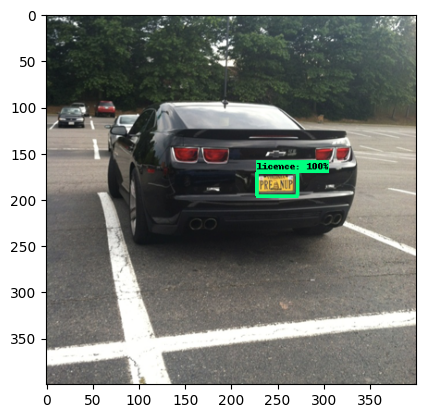

In [61]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [17]:
# ocr
!pip install easyocr
!pip3 install torch torchvision torchaudio
# !pip install paddleocr



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 18.4 MB/s eta 0:00:00


In [18]:
!pip install uuid

  Preparing metadata (setup.py) ... done
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6476 sha256=390d1ef3254fcc46bf883f5d08b8401c3995096dd11fa79d4532a5f6a7d61d5c
  Stored in directory: /root/.cache/pip/wheels/ed/08/9e/f0a977dfe55051a07e21af89200125d65f1efa60cbac61ed88
Successfully built uuid


In [59]:
!pip install paddleocr --upgrade
!pip install paddlepaddle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 112.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 103.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 108.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 107.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 79.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.4/148.4 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00


In [31]:
!apt install -y  openssl11-libs

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package openssl11-libs


In [53]:
region_threshold = 0.1
detection_threshold = 0.7

# gpus = tf.config.list_physical_devices('GPU')
# print(gpus)
# if gpus:
#         try:
#             # allocating 5gb for tensorflow on gpu
#             tf.config.experimental.set_virtual_device_configuration(
#                 gpu[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])
#         except RunetimeError as e:
#             print(e)


In [51]:
import easyocr
def filter_text(region,ocr_result,region_threshold):
        rectangle_size = region.shape[0]*region.shape[1]
        plate = []

        for result in ocr_result:
            length = np.sum(np.subtract(result[0][1],result[0][0]))
            height = np.sum(np.subtract(result[0][2],result[0][1]))
            print(length,height)

            if length*height / rectangle_size > region_threshold:
                plate.append(result[1])
        return plate

def ocr_it(image,detections,detection_threshold,region_threshold):
    # scores , boxes and classes above detection threshold
        scores = list(filter(lambda x: x > detection_threshold, detections['detection_scores']))  #extracting scores whose score is greater than threshold
        boxes = detections['detection_boxes'][:len(scores)]  # filtering box coordinates (4 coordinates)
        classes = detections['detection_classes'][:len(scores)] # filtering classes => 0 - represent license

        # image dimensions
        width = image.shape[1]
        height = image.shape[0]

        # applying ROI filtering and OCR
        for idx,box in enumerate(boxes):
            roi = box * [height,width,height,width]
            region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]

            # easy ocr setup
            reader = easyocr.Reader(['en'])
            ocr_result = reader.readtext(region)
        #     print(ocr_result)

            text = filter_text(region,ocr_result,region_threshold)
            plt.imshow(cv2.cvtColor(region,cv2.COLOR_BGR2RGB))
            print(text)

            return text,region


    # Saving Images
def save_results(text,region,csv_filename,folder_path):
        img_name = f'{uuid.uuid1()}.jpg'

        cv2.imwrite(os.path.join(folder_path,img_name),region)

        with open(csv_filename,mode='a',newline='',encoding="utf-8") as f:
            csv_writer = csv.writer(f,delimiter=',',quotechar='"',quoting=csv.QUOTE_MINIMAL)
            csv_writer.writerow([img_name,text])

In [58]:
import cv2
import paddleocr

def ocr_it(image, detections, detection_threshold, region_threshold):
    # scores, boxes, and classes above the detection threshold
    scores = list(filter(lambda x: x > detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]

    # image dimensions
    width = image.shape[1]
    height = image.shape[0]

    # applying ROI filtering and OCR
    for idx, box in enumerate(boxes):
        roi = box * [height, width, height, width]
        region = image[int(roi[0]):int(roi[2]), int(roi[1]):int(roi[3])]

        # convert region to RGB for PaddleOCR
        region_rgb = cv2.cvtColor(region, cv2.COLOR_BGR2RGB)

        # Initialize PaddleOCR instance with specified languages
        ocr = paddleocr.OCR(lang=['en', 'hi', 'mr', 'ta'])

        # Perform OCR on the region
        ocr_result = ocr.ocr(region_rgb)

        # Extract OCR text and confidence from the result
        text = [item[1][0] for item in ocr_result]
        confidence = [item[1][1] for item in ocr_result]
        language = [item[1][2] for item in ocr_result]  # Extract the detected language code

        # Filter text based on region_threshold confidence threshold and supported languages
        filtered_text = [text[i] for i in range(len(text)) if confidence[i] >= region_threshold and language[i] in ['en', 'hi', 'mr', 'ta']]

        # Print filtered text and display region
        print(filtered_text)
        plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))

        return filtered_text, region


ModuleNotFoundError: ignored

34 14
['PREALL']
['PREALL']


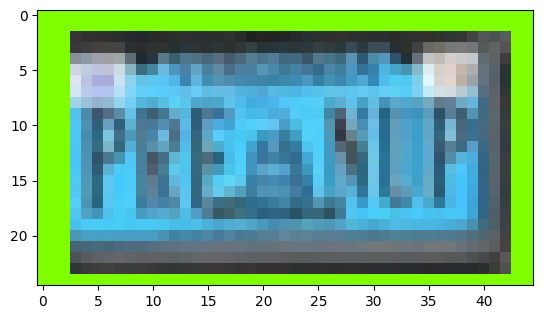

In [62]:
text,region = ocr_it(image_np_with_detections,detections,detection_threshold,region_threshold)
# save_results(text,region,'detection_results.csv','Detection_Images')
print(text)
plt.imshow(region)

In [37]:
!pip uninstall Pillow
!pip install Pillow==9.5.0

Found existing installation: Pillow 10.0.0
Uninstalling Pillow-10.0.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/PIL/*
    /usr/local/lib/python3.10/dist-packages/Pillow-10.0.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libXau-154567c4.so.6.0.0
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libbrotlicommon-702ab7f8.so.1
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libbrotlidec-7a796284.so.1.0.9
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libfreetype-8b16add1.so.6.20.0
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libharfbuzz-adaef2a2.so.0.60730.0
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libjpeg-dab02bf4.so.62.3.0
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/liblcms2-0821774a.so.2.0.15
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/liblzma-9dd5c569.so.5.4.3
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libopenjp2-20e347f0.so.2.5.0
    /usr/local/lib/python3.1

In [ ]:
# //video feed

!pip uninstall opencv-python-headless -y

Found existing installation: opencv-python-headless 4.8.0.74
Uninstalling opencv-python-headless-4.8.0.74:
  Successfully uninstalled opencv-python-headless-4.8.0.74


In [ ]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened():
    ret, frame = cap.read()
    image_np = np.array(frame)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored